In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path = "youtube_comments_climate_change/cleaned_data.csv"
data = pd.read_csv(path, sep=",", encoding='utf-8', index_col=[0])

list(data.columns)

['publishedAt', 'authorName', 'text', 'isReply', 'cleaned']

In [2]:
import numpy as np
import matplotlib.pyplot as plt

embeddings = np.load('youtube_comments_climate_change/embeddings_transformer.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

/usr/local/lib/python3.8/site-packages/umap/rp_tree.py:777: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  warn(


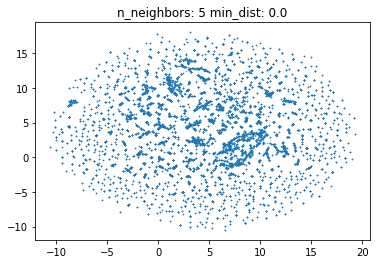

/usr/local/lib/python3.8/site-packages/umap/rp_tree.py:777: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  warn(


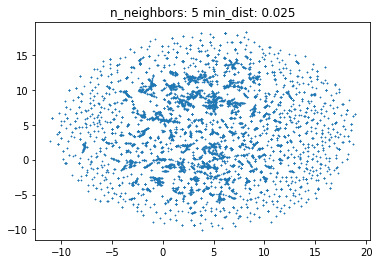

/usr/local/lib/python3.8/site-packages/umap/rp_tree.py:777: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  warn(


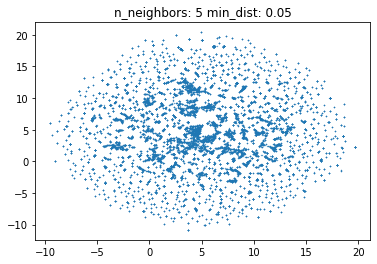

/usr/local/lib/python3.8/site-packages/umap/rp_tree.py:777: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  warn(


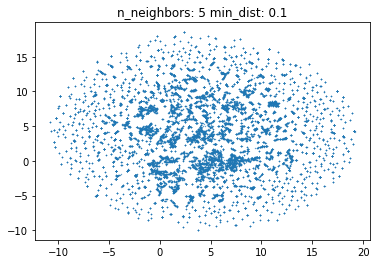

/usr/local/lib/python3.8/site-packages/umap/rp_tree.py:777: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  warn(


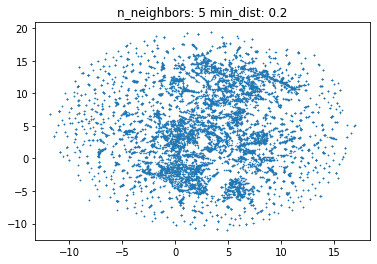

/usr/local/lib/python3.8/site-packages/umap/rp_tree.py:777: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  warn(


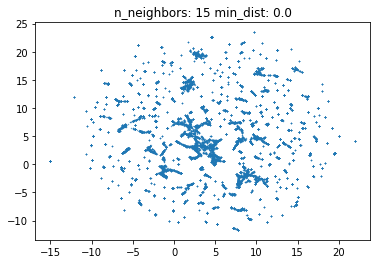

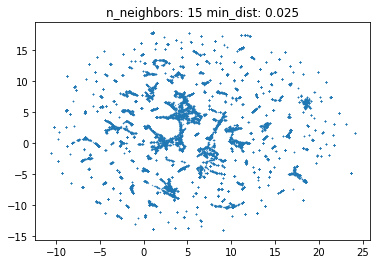

/usr/local/lib/python3.8/site-packages/umap/rp_tree.py:777: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  warn(


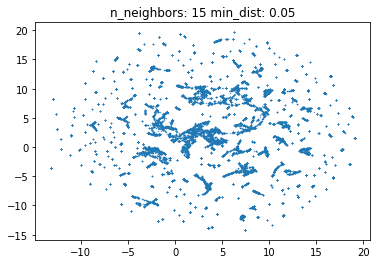

/usr/local/lib/python3.8/site-packages/umap/rp_tree.py:777: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  warn(


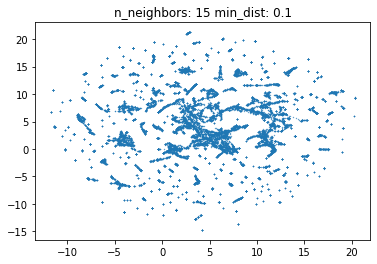

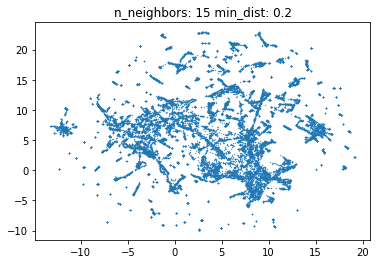

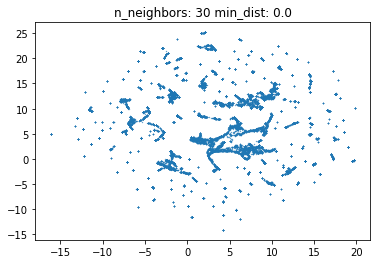

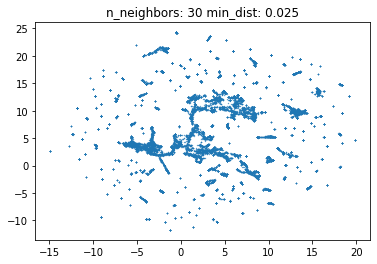

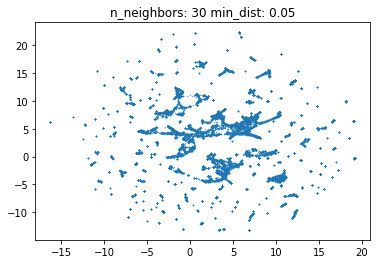

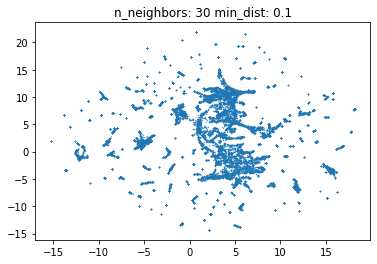

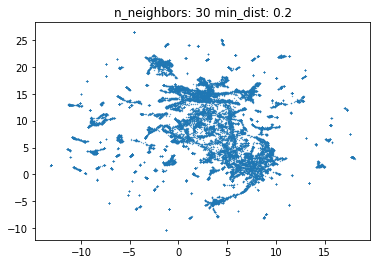

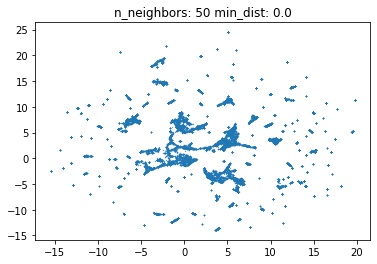

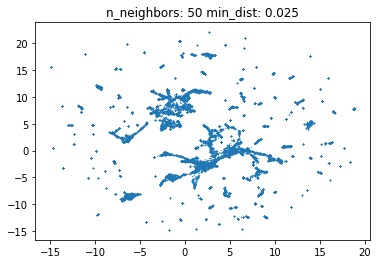

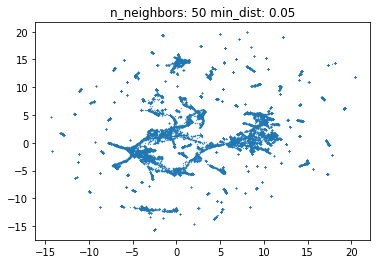

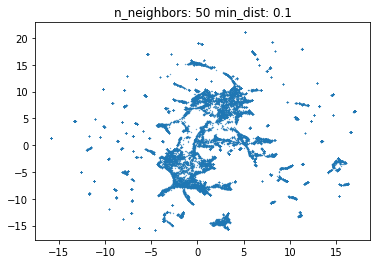

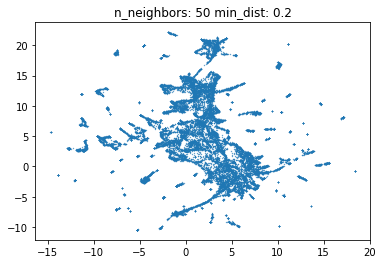

In [6]:
import umap

for i in (5, 15, 30, 50):
    for j in (0.0, 0.025, 0.05, 0.1, 0.2):
        tmp_embedding = umap.UMAP(metric="cosine", n_neighbors=i, min_dist=j, n_components=100).fit_transform(embeddings)
        new_embedding = umap.UMAP(metric="cosine", n_neighbors=i, min_dist=j, n_components=2).fit(tmp_embedding)
        plt.scatter(new_embedding.embedding_[:, 0], new_embedding.embedding_[:, 1], s=0.1)
        plt.title("n_neighbors: {} min_dist: {}".format(i, j))
        plt.savefig('umap/{}-{}-umap-100comp.png'.format(i,j), bbox_inches='tight')
        plt.show()

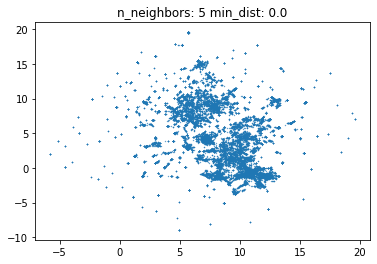

/usr/local/lib/python3.8/site-packages/umap/spectral.py:252: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.8/site-packages/umap/spectral.py:252: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


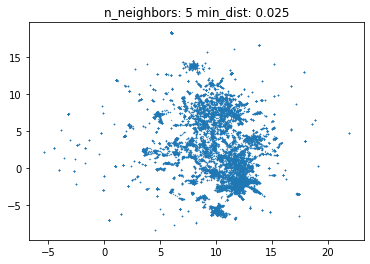

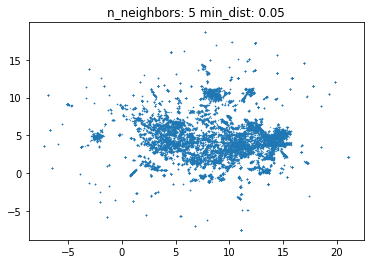

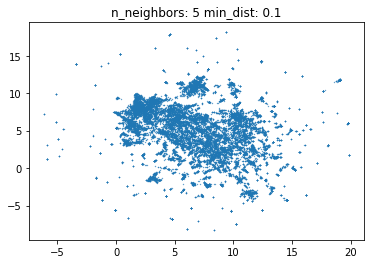

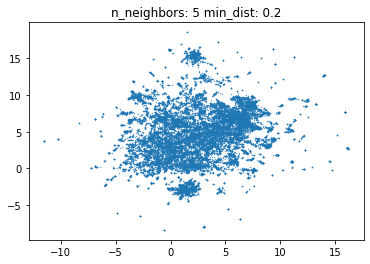

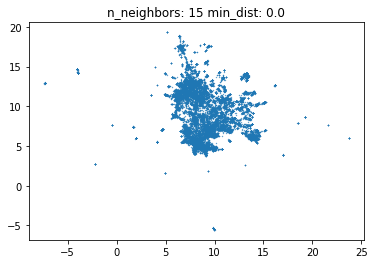

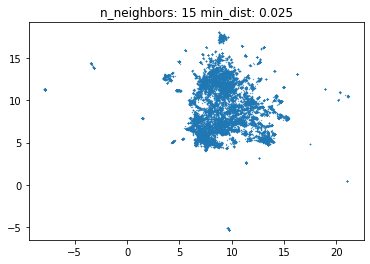

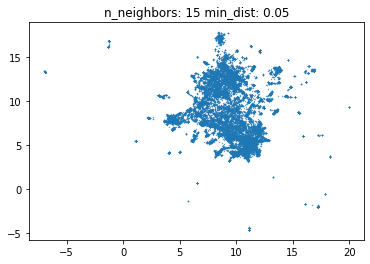

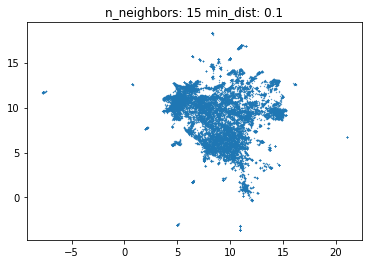

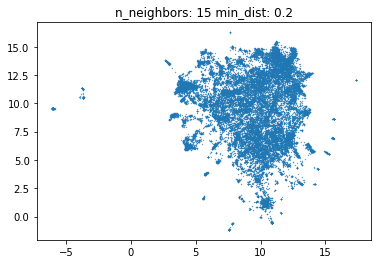

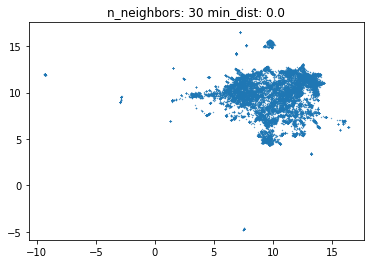

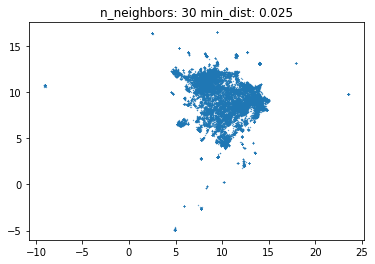

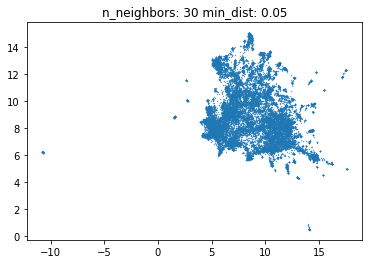

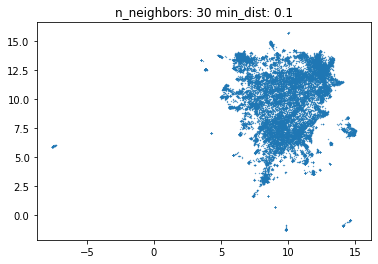

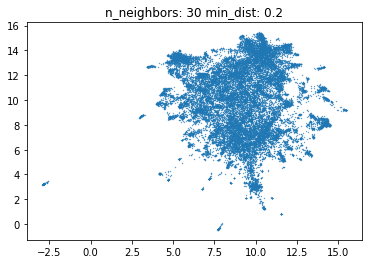

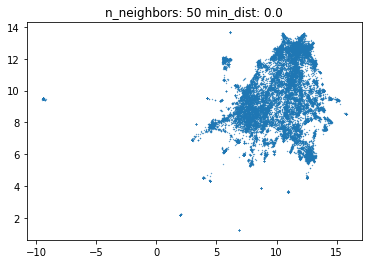

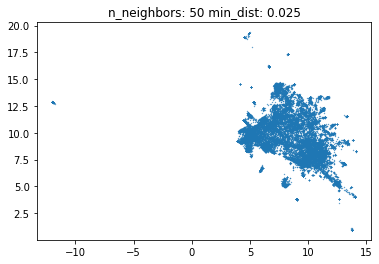

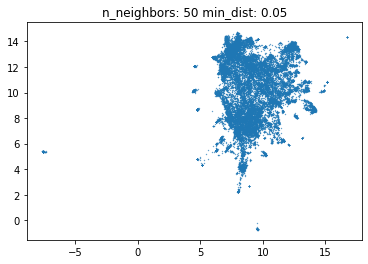

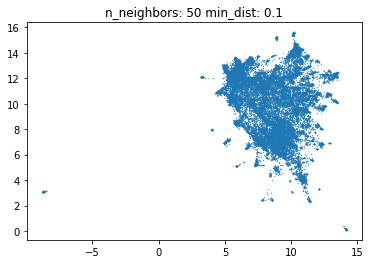

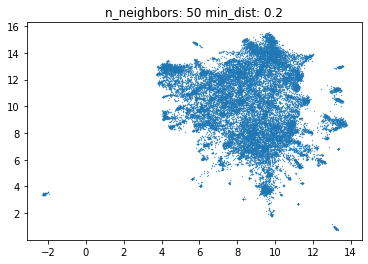

In [8]:
for i in (5, 15, 30, 50):
    for j in (0.0, 0.025, 0.05, 0.1, 0.2):
        umap_embedding = umap.UMAP(metric="cosine", n_neighbors=i, min_dist=j, n_components=2).fit_transform(embeddings)
        plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=0.1)
        plt.title("n_neighbors: {} min_dist: {}".format(i, j))
        plt.savefig('umap/{}-{}-umap-2comp.png'.format(i,j), bbox_inches='tight')
        plt.show()

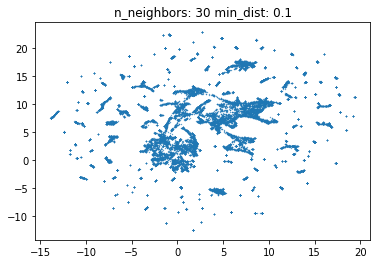

In [4]:
plt.scatter(new_embeddings.embedding_[:, 0], new_embeddings.embedding_[:, 1], s=0.1)
plt.title("n_neighbors: {} min_dist: {}".format(30, 0.1))
plt.show()

In [ ]:
import umap.plot

umap.plot.diagnostic(new_embeddings, diagnostic_type='local_dim')

In [3]:
reduced_embeddings = np.load('reduced_umap_100.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

# Agglomerative Clustering

In [5]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Z_ward = sch.linkage(reduced_embeddings, 'ward')
Z_average = sch.linkage(reduced_embeddings, 'average')

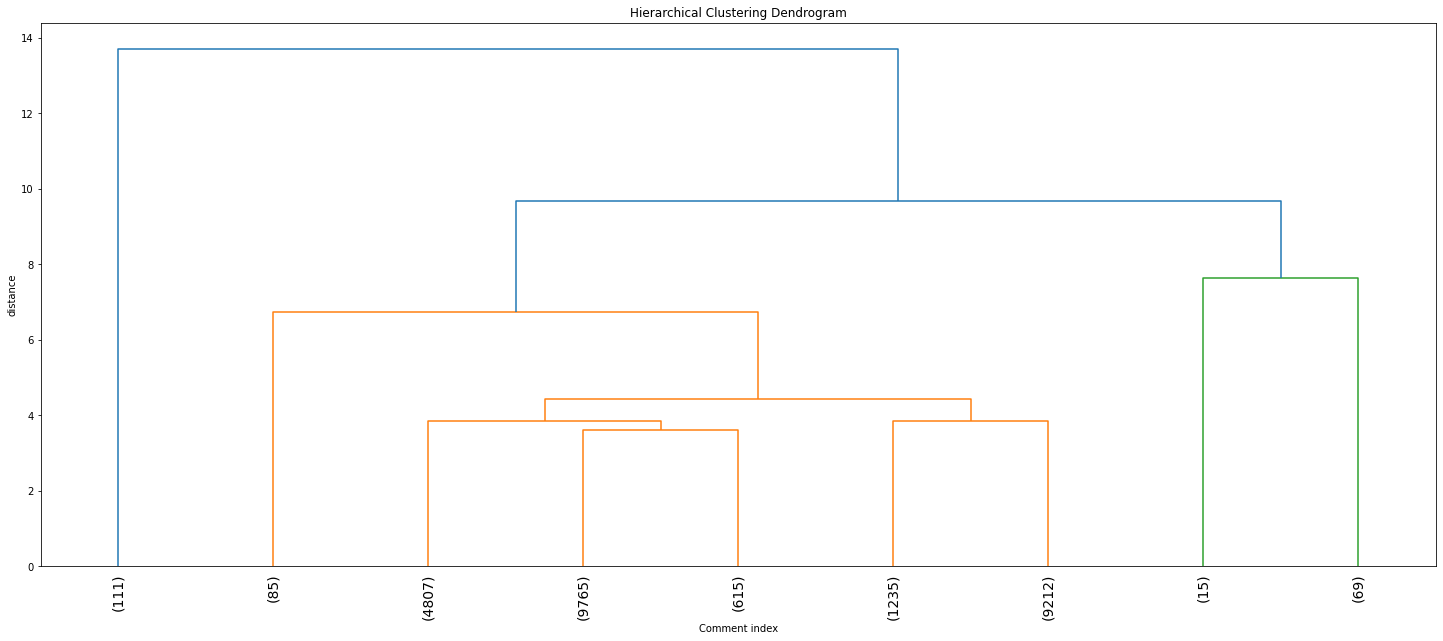

In [100]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Comment index')
plt.ylabel('distance')
sch.dendrogram(
    Z_average,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=9,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

In [98]:
roots = pd.DataFrame()

for index, i in enumerate([111, 7100, 1262, 334, 5144, 1553, 3922, 601, 2887]):
    roots[index] = data.iloc[i, :-1]

In [99]:
roots.T

,publishedAt,authorName,text,isReply,cleaned,labels_agglomerative
0,2019-12-24 09:07:39,Isaias Rea,No just the city im sure the people would just...,1,No just the city im sure the people would just...,2
1,2018-08-20 21:01:54,SomeRandomGuy,"0:30 ""Mr. Belgium... I don't feel so good.""\n\n",0,"0:30 ""Mr. Belgium... I don't feel so good.""\n\n",1
2,2019-07-18 14:22:00,Saxito Pau,"Florida gets deleted, but most Caribbean islan...",0,"Florida gets deleted, but most Caribbean islan...",1
3,2019-11-17 01:12:45,Timelessmusic Familymusic,I always wondered how the ocean water never ri...,0,I always wondered how the ocean water never ri...,2
4,2019-01-28 23:08:37,C ROM,Build a dam!!!\n\n,1,Build a dam!!!\n\n,2
5,2019-06-11 10:31:44,Jonathon G.,Hahahahaha!!\n\n,1,Hahahahaha!!\n\n,3
6,2019-01-23 10:26:04,Mojo,Its not if... Its happening now\n\n,0,Its not if... Its happening now\n\n,6
7,2019-10-13 08:14:36,Curtis Martin,I’m good\n\n,0,I’m good\n\n,6
8,2019-04-28 13:31:36,Nelson Lirio,India has not sank all the way yet\n\n,1,India has not sank all the way yet\n\n,1


In [88]:
from sklearn.metrics import silhouette_samples, silhouette_score

ac_clustering = AgglomerativeClustering(
    distance_threshold=None,
    n_clusters=9,
    affinity='cosine',
    linkage='average',
).fit(reduced_embeddings)

TypeError: __init__() got an unexpected keyword argument 'compute_distances'

In [94]:
ac_clustering.children_.shape

(25913, 2)

In [21]:
data['labels_agglomerative'] = ac_clustering.labels_

In [13]:
labels = ac_clustering.labels_
s_score = silhouette_score(reduced_embeddings, labels)
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print("The silhouette score with {} clusters: {}".format(9, s_score))

frequencies

The silhouette score with 9 clusters: 0.36085161566734314


array([[   0,  615],
       [   1, 7888],
       [   2, 8413],
       [   3, 1226],
       [   4,  111],
       [   5,   69],
       [   6, 7492],
       [   7,   15],
       [   8,   85]])

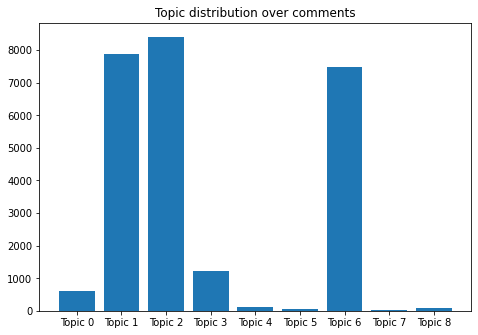

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

y = [615, 7888, 8413, 1226, 111, 69, 7492, 15, 85]
x = []

for i, topic in enumerate(y):
    x.append('Topic {}'.format(i))

ax.bar(x,y)
ax.set_title('Topic distribution over comments')
plt.show()

In [15]:
import umap 

n_neighbors = 30
min_dist = 0.1
n_components = 2

d2_embeddings = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric='cosine'
).fit_transform(reduced_embeddings)

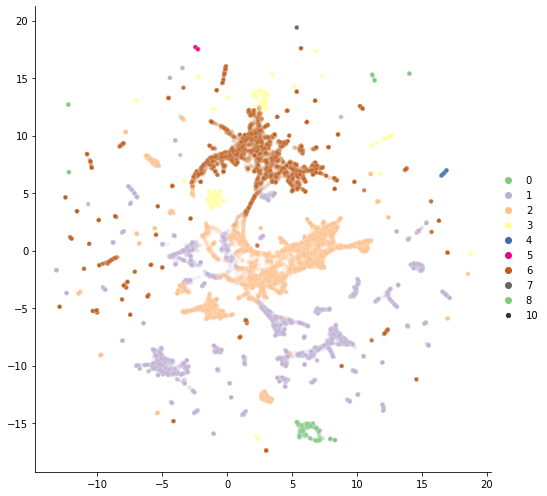

In [16]:
import seaborn as sns

palette_param = "Accent"
alpha_param = 0.2


sns.relplot(x = d2_embeddings[:, 0], y = d2_embeddings[:, 1], size = 10, hue = labels, palette = palette_param,alpha = alpha_param,height = 7)

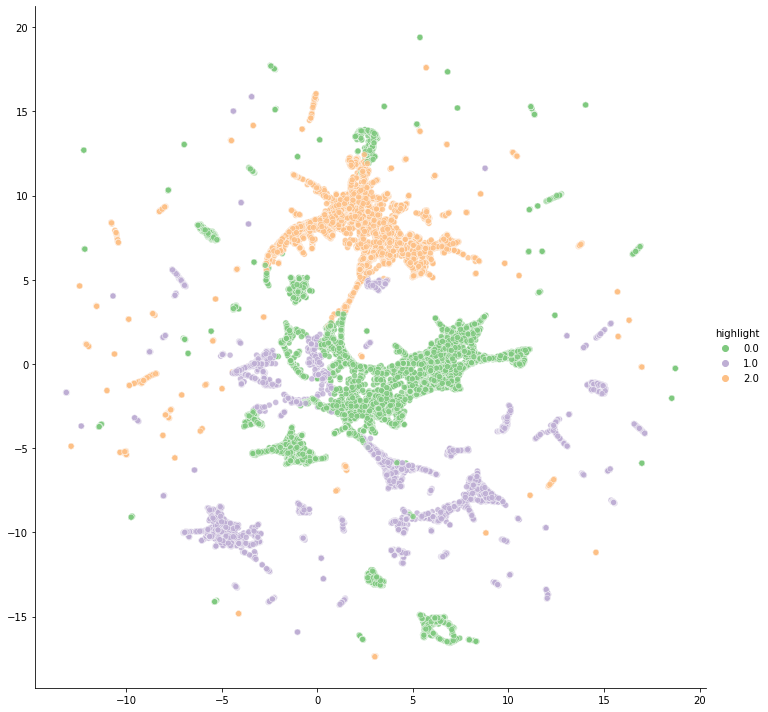

In [26]:
cluster_num = 1
cluster_num_2 = 6

data['highlight'] = np.zeros(len(data.index))
data.loc[data['labels_agglomerative'] == cluster_num, 'highlight'] = 1
data.loc[data['labels_agglomerative'] == cluster_num_2, 'highlight'] = 2

sns.relplot(x = d2_embeddings[:, 0], y = d2_embeddings[:, 1],  hue = data['highlight'], palette = "Accent",alpha = 0.8,height = 10)

In [23]:
# Choose a cluster to print
cluster_number = 0
# Choose the number of samples to print
number_of_samples_to_print = 1000

data['labels_agglomerative'] = data['labels_agglomerative'].astype('category')
cluster = data[data['labels_agglomerative']==cluster_number]
if cluster["text"].count()<=number_of_samples_to_print:
  number_of_samples_to_print = cluster["text"].count()

print("Number of samples in the cluster:", cluster["text"].count())
cluster.tail(100)

Number of samples in the cluster: 615


,publishedAt,authorName,text,isReply,cleaned,labels_agglomerative
25473,2015-04-03 06:37:15,YoKarloz,Argentina desapareció :v lol los odian\n\n,0,Argentina desapareció :v lol los odian\n\n,0
25475,2015-04-23 00:33:17,Juan M. Quiroga,@YoKarloz No desapareció ni la mitad del pais ...,1,@ No desapareció ni la mitad del pais que habl...,0
25476,2015-04-19 08:29:26,Franco Sagripanti,@Seaborgium 14 Santa Fe también :'v\n\n,1,@Seaborgium 14 Santa Fe también :'v\n\n,0
25477,2015-04-04 09:48:40,panterablanca9999,Desaparecer ahí terreno de sobra no viste el v...,1,Desaparecer ahí terreno de sobra no viste el v...,0
25481,2015-04-03 05:38:45,saul canedo,no se si no tomaron encuenta a mexico o a mexi...,0,no se si no tom encuenta a mexico o a mexico n...,0
...,...,...,...,...,...,...
25624,2015-04-09 20:59:12,bastiboy,@wsalinas1 que estupido tu comentario\n\n,1,@ que estupido tu comentario\n\n,0
25626,2015-04-05 15:39:53,Scott Andrew Biederer Czajkowski,si la tierra se inundara 5.000 metros ahi seri...,1,si la tierra se inundara 5.000 metros ahi seri...,0
25628,2015-04-05 01:12:20,Scott Andrew Biederer Czajkowski,@wsalinas1 Chile no desaparece porq esta sobre...,1,@ Chile no desaparece porq esta sobre 600 metr...,0
25629,2015-04-02 15:00:03,Moyplay,¡Ahuevo! triunfo el mal\n\n,0,¡Ahuevo! triunfo el mal\n\n,0


In [27]:
ac_clustering

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=9)